<a href="https://colab.research.google.com/github/mon0mon/Do_it_DeepLearning/blob/main/Chapter_03_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [3]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [9]:
diabetes.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [15]:
diabetes.target[:3]

array([151.,  75., 141.])

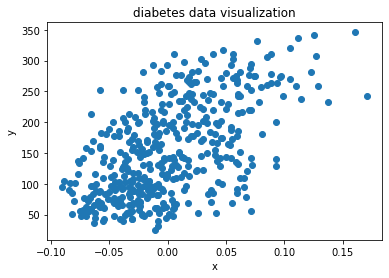

In [18]:
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:, 2], diabetes.target)
plt.title("diabetes data visualization")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [16]:
x = diabetes.data[:, 2]
y = diabetes.target

03-2 경사 하강법(Gradient Descent)


---
ŷ = wx+b

: 기존의 값을 통해, 예측하는 y 값으로, ŷ(y-hat)과 w(weigth) 또는 θ(Theta)로 표기, b(intersect)로 구성됨

※ w와 b를 찾기 위한 방법


> ① 무작위로 w와 b를 정함

> ② x에서 샘플 하나를 선택하여 ŷ를 계산

> ③ ŷ과 선택한 샘플의 진짜 y값을 비교

> ④ ŷ이 y과 근접한 값이 되도록 w, b를 조정

> ⑤ 모든 샘플을 처리 할 때까지 ② ~ ④ 항목 반복 시행



In [19]:
# 훈련 데이터에 맞는 w와 b 찾아보기
# 1) w와 b 초기화

w = 1.0
b = 1.0

In [29]:
# 2) 훈련데이터의 첫 번째 샘플 데이터로 ŷ 얻기

y_hat = x[0] * w + b
print(y_hat)
print('{} : {}'.format('x', x[0]))

1.0616962065186886
x : 0.0616962065186885


In [38]:
# 3) 타깃과 예측 데이터 비교하기
print('ŷ : {}'.format(y_hat))
print('y : {}'.format(y[0]))
print('diffrernce : {}'.format(abs(y_hat-y[0])))

ŷ : 1.0616962065186886
y : 151.0
diffrernce : 149.9383037934813


In [42]:
# 4) w 값 조절해 예측값 바꾸기
w_inc = w + 0.1;
y_hat_inc = x[0] * w_inc + b
print('ŷ : {}'.format(y_hat))
print('ŷ_inc : {}'.format(y_hat_inc))
print('diffrernce : {}'.format(abs(y_hat-y_hat_inc)))

ŷ : 1.0616962065186886
ŷ_inc : 1.0678658271705574
diffrernce : 0.006169620651868879


In [43]:
# 5) w 값 조정 후 예측값 증가 정도 확인
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print(w_rate)

0.061696206518688734


※ w_rate = y_hat_inc - y_hat / w_inc - w = (x[0] * w_inc + b) - (x[0] * w + b) / w_inc - w = (x[0] * (w + 1) - w) / (w + 0.1) - w = x[0]



변화율이 양수일 때 가중치를 업데이트 하는 방법

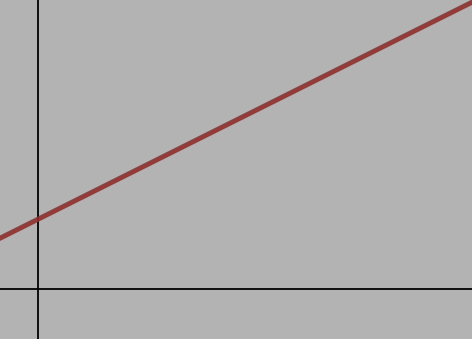

* x 축 = w, y축은 ŷ

* w가 증가함에 따라, ŷ도 증가

* 따라서 변화율을 w에 더하는 방법으로 w를 증가시길 수 있음



---

변화율이 음수일 때 가중치를 업데이트 하는 방법



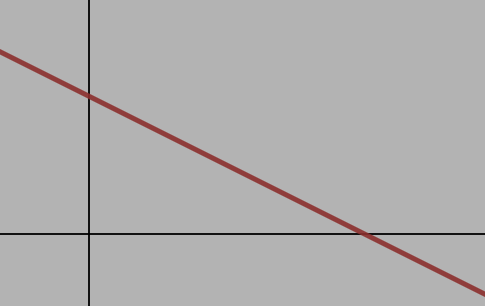


* x 축은 w, y축은 ŷ

* w가 증가함에 따라 ŷ은 감소

* 따라서 변화율을 w에 더하는 방법으로 w를 감소 시킬 수 있음


In [45]:
# 변화율로 가중치 업데이트
w_new = w + w_rate
print('w_new(업데이트 된 가중치) : {}'.format(w_new))

w_new(업데이트 된 가중치) : 1.0616962065186888


In [49]:
# 변화율로 절편 업데이트
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
print('y_hat_inc : {}'.format(y_hat_inc))
print('y_hat : {}'.format(y_hat))

b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print('b_rate : {}'.format(b_rate))

# b를 업데이트 하기 위해서는 변화율이 1이므로, 1 만큼 더하면 됨
b_new = b + 1
print('b_new : {}'.format(b_new))

y_hat_inc : 1.1616962065186887
y_hat : 1.0616962065186886
b_rate : 1.0
b_new : 2.0


오차 역전파로 가중치와 절편을 더 적절하게 업데이트

오차 역전파(Backpropagation)은 ŷ와 y의 차이를 이용하여 w와 b를 업데이트
- 오차가 연이어 전파되며, 수행



In [50]:
# 오차의 변화율을 곱하여 가중치 업데이트
# 1) x[0] 일 때, w의 변화율과 b의 변화율에 오차를 곱한 다음 w, b 업데이트 후 출력

err = y[0] - y_hat
w_new = w+ w_rate * err
b_new = b + 1 * err
print('w_new : {}, b_new : {}'.format(w_new, b_new))

w_new : 10.250624555904514, b_new : 150.9383037934813


In [51]:
# 2) x[1] 일 때, 오차를 구하고 w, b 업데이트 후 출력

y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_new * err
b_new = b_new + 1 * err
print('w_new : {}, b_new : {}'.format(w_new, b_new))

# 위와 같은 방식을 모든 샘플에 사용해서, 가중치와 절편 업데이트

w_new : -762.7557644215193, b_new : 75.52764127612664


In [52]:
# 3) 전체 샘플 반복하기

for x_i, y_i in zip(x, y):
  y_hat = x_i * w + b
  err = y_i - y_hat
  w_rate = x_i
  w = w + w_rate * err
  b = b + 1 * err
print('w : {}, b : {}'.format(w, b))

w : 587.8654539985689, b : 99.40935564531424


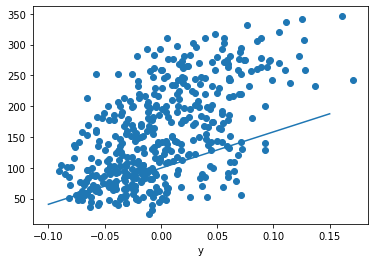

In [54]:
# 4) 모델 테스트

plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.xlabel('y')
plt.show()

In [55]:
# 5) 여러 에포크 반복
# 에포크(epoch) : 전체 데이터를 모두 이용하여 한 단위의 작업을 진행하는 것
# 예제에선 100번의 에포크를 진행하면서, 직선이 변동사항을 체크

for i in range(1, 100):
  for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
print('w : {}, b : {}'.format(w, b))

w : 913.5973364345905, b : 123.39414383177204


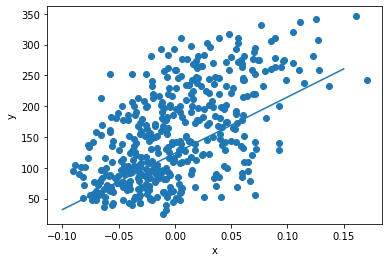

In [56]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 적절한 수준의 머신 러닝 모델 발견

y_pred : 287.8416643899983


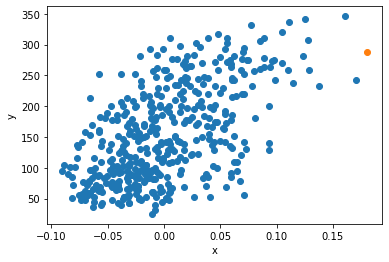

In [58]:
# 6) 모델로 예측

x_new = 0.18
y_pred = x_new * w + b
print('y_pred : {}'.format(y_pred))

plt.scatter(x, y)
plt.scatter(x_new, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

복습


> 1.   w와 b를 임의의 값(1.0, 1.0)으로 초기화 하고 훈련 데이터의 샘플을 대입하여 y와 ŷ의 오차를 구함
> 2.   1에서 구한 오차를 w와 b의 변화율에 곱하고 이 값을 이용하여 w와 b를 업데이트
> 3.   만약 ŷ이 y보다 커지면, 오차는 음수가 되어 자동으로 w와 b가 줄어드는 방향으로 업데이트
> 4.   반대로 ŷ이 y보다 작으면, 오차는 양수가 되어 w와 b가 더 커지도록 업데이트


